#**Creation of CSV file for Regression from multi-class directory structure (each regerssion value represented by its own "class" or directory)**


### In this colab notebook, you'll learn how to
 

*  read in directories in a dataset main directory where each directory represents a different "class" or rather a regression value
*  create a csv that has imagename, regression value (class label)
* THIS is to facilitat the use of Roboflow multi-class labeling as a means to label regression data ---as there currently is no roboflow tools for labeling for regression  (note: make sure all from roboflow is in one main directory --so do train 100% and test and valid 0 so can download to one directory)


So the following will be what the  data directories will look like for our test case of Stroke eye severity ranging from 0.0 to 10.0 at steps of 0.5 (or different)

* 0.0
* 0.5
* 1.0
* 1.5
* and so on



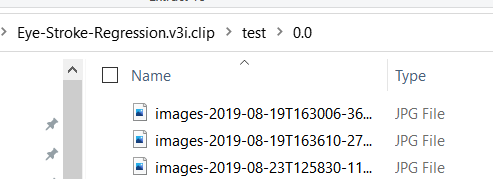

In [ ]:
# Copyright 2023 iLab @ CSUEB. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# STEP 0: mount Drive and install libraries and import packages

### assumes data in drive/Mask/MaskDetect/data


Here you'll use the dataset given in test, valid and train directoris inside of


*  grab the zip and unzip and upload the content to your drive in the path YOUDRIVE/Mask/MaskDetect

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## STEP 1:  SETUP

In [ ]:
import os
import csv

#STEP 2:  read the directories and create the csv file as described above

In [ ]:
main_dir = "drive/MyDrive/Stroke/LabeledData-Mouth-Regression"
data_dir="drive/MyDrive/Stroke/LabeledData-Mouth-Regression/data"

regression_file = os.path.join(main_dir, "regressionData.csv")

print("going to create " + regression_file)

i=0


with open(regression_file, "w", newline="") as csvfile:

    fieldnames = ['image', 'severity']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
   # writer = csv.writer(csvfile)

    #for some reason I must explictly write the name of the columns as first row for my regression colab to read in 
    # properly with the pandas package
    row = {'image': 'image', 'severity': 'severity'}
    print(row)
    writer.writerow(row)

    for folder in os.listdir(data_dir):
        print(folder)

        folder_path = os.path.join(data_dir, folder)
        print(folder_path)
        files = os.listdir(folder_path)

# writer.writerow({'first_name': 'Wonderful', 'last_name': 'Spam'})



        #now cycle through all the files in the directory and add to cvs file
        for file in files:
            print("on image " + str(i))
            i = i+1
            file_with_foldername = os.path.join(folder, file)
            row = {'image': file_with_foldername, 'severity':folder }
            print(row)
            writer.writerow(row)


going to create drive/MyDrive/Stroke/LabeledData-Mouth-Regression/regressionData.csv
{'image': 'image', 'severity': 'severity'}
5.5
drive/MyDrive/Stroke/LabeledData-Mouth-Regression/data/5.5
on image 0
{'image': '5.5/images-75-_jpg.rf.0d6b7cd1ae91c025eaca6fdc36d27ddb.jpg', 'severity': '5.5'}
on image 1
{'image': '5.5/images-2019-08-19T164626-783_jpg.rf.d63b5991e5deba5672b371bb1025768c.jpg', 'severity': '5.5'}
on image 2
{'image': '5.5/images-2019-08-23T122605-826_jpg.rf.9d635cc32f3afd932b78ae270b1f0b9f.jpg', 'severity': '5.5'}
on image 3
{'image': '5.5/images-2019-08-19T155652-258_jpg.rf.9d9ca5442f4c92ee5e52abdc5bf58750.jpg', 'severity': '5.5'}
on image 4
{'image': '5.5/images-2019-08-23T122156-379_jpg.rf.51ff9cc0d8985b851a94e57fd21d9707.jpg', 'severity': '5.5'}
on image 5
{'image': '5.5/images-13-_jpg.rf.ad933f99f0102c39c0f2fc833a945d30.jpg', 'severity': '5.5'}
on image 6
{'image': '5.5/images-2019-08-23T114457-963_jpg.rf.c21358c8ff56e89c147931fab90b3705.jpg', 'severity': '5.5'}
on im

In [ ]:
!cat  $regression_file

image,severity
5.5/images-75-_jpg.rf.0d6b7cd1ae91c025eaca6fdc36d27ddb.jpg,5.5
5.5/images-2019-08-19T164626-783_jpg.rf.d63b5991e5deba5672b371bb1025768c.jpg,5.5
5.5/images-2019-08-23T122605-826_jpg.rf.9d635cc32f3afd932b78ae270b1f0b9f.jpg,5.5
5.5/images-2019-08-19T155652-258_jpg.rf.9d9ca5442f4c92ee5e52abdc5bf58750.jpg,5.5
5.5/images-2019-08-23T122156-379_jpg.rf.51ff9cc0d8985b851a94e57fd21d9707.jpg,5.5
5.5/images-13-_jpg.rf.ad933f99f0102c39c0f2fc833a945d30.jpg,5.5
5.5/images-2019-08-23T114457-963_jpg.rf.c21358c8ff56e89c147931fab90b3705.jpg,5.5
5.5/images-2019-08-19T165252-614_jpg.rf.7b5d0b1c4ebfe707e90f796ebc9d20e6.jpg,5.5
5.5/images-2019-08-19T155244-563_jpg.rf.1596ba467b4e41530eb21e14dea6197f.jpg,5.5
5.5/images-2019-08-23T114457-963_jpg.rf.13b8ac3078f57051376c7413fe70f979.jpg,5.5
5.5/fd12_PNG_jpg.rf.925106c9654a66a5da0fbd4c29024e97.jpg,5.5
5.5/images-2019-08-23T112315-184_jpg.rf.0eb2fbcc060550e2a6c31d9612341783.jpg,5.5
5.5/Before-Selective-Neurolysis-with-Asymmetric-Facelift-Dr-Azizzadeh